# Entropy Calculation
**Shannon （Information） Entropy, Approximate entropy (ApEn), Sample Entropy (SampEn)**

<div class="altert alert-info"> <h4> Information</h4>

    
<li> Author: DongHui Song </li>
     
<li> Email:donghuipsy@gmail.com </li>
     
<li>Homepage:<a>https://donghui1119.github.io/donghui/</a> </li>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ts1=[0.84782609	,0.2173913	,-0.56521739	,-0.58695652	,0.54347826	,-0.7826087	,0.26086957	,0.47826087	,-0.04347826	,
    0.89130435	,0.2173913	,0.06521739	,0.80434783	,0.89130435	,-0.15217391	,-0.15217391	,0.06521739	,
0.2826087	,0.02173913	,-0.04347826	,-0.02173913	,-0.43478261	,0.17391304	,-0.32608696	,-0.30434783	,
-0.10869565	,-0.23913043	,-0.58695652	,0.15217391	,0.17391304	,0.10869565	,0.08695652	,0.13043478	,-0.08695652	,
0.65217391	,-0.26086957	,0.65217391	,0.36956522	,0.80434783	,0.7173913	,0.32608696	,0	,-0.04347826	,-0.23913043	,
0.36956522	,0.41304348	,0.2826087	,0.65217391	,0.60869565	,-0.2826087	,-0.45652174	,-0.23913043	,0.45652174	,
-0.2173913	,0.32608696	,0.15217391	,0.13043478	,-0.17391304	,0.15217391	,0.89130435	,-0.23913043	,-0.36956522	,
0.32608696	,0.06521739	,0.17391304	,-0.47826087	,-0.02173913	,0.45652174	,0.34782609	,-0.32608696	,0.23913043	]

ts2=[0.84782609	,0.8173913	,-0.86521739	,-0.88695652	,0.84347826	,-0.7826087	,0.26086957	,0.47826087	,-0.4347826	,
    0.89130435	,0.2173913	,0.06521739	,0.80434783	,0.89130435	,-0.15217391	,-0.15217391	,0.6521739	,
0.2826087	,0.02173913	,-0.04347826	,-0.02173913	,-0.43478261	,0.17391304	,-0.32608696	,-0.30434783	,
-0.10869565	,-0.23913043	,-0.58695652	,0.15217391	,0.87391304	,0.10869565	,0.88695652	,0.13043478	,-0.8695652	,
0.65217391	,-0.26086957	,0.65217391	,0.36956522	,0.80434783	,0.7173913	,0.32608696	,0	,-0.04347826	,-0.23913043	,
0.36956522	,0.41304348	,0.2826087	,0.85217391	,0.60869565	,-0.2826087	,-0.45652174	,-0.23913043	,0.45652174	,
-0.2173913	,0.32608696	,0.15217391	,0.13043478	,-0.17391304	,0.15217391	,0.89130435	,-0.23913043	,-0.36956522	,
0.32608696	,0.06521739	,0.17391304	,-0.47826087	,-0.82173913	,0.45652174	,0.34782609	,-0.32608696	,0.23913043	]

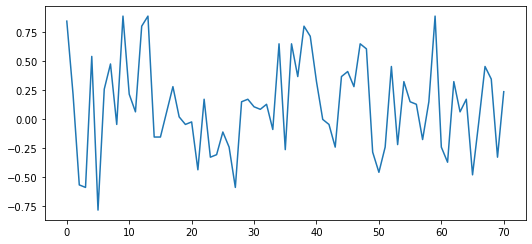

In [7]:
#plotting timeseries1
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x1 = np.array(ts1)
plt.plot(x1)
plt.show()

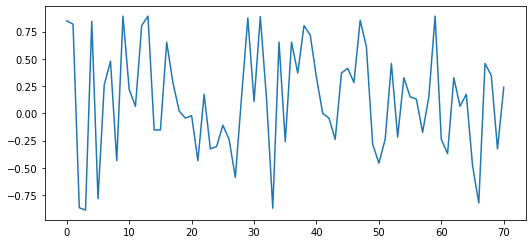

In [8]:
#plotting timeseries2
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x2 = np.array(ts2)
plt.plot(x2)
plt.show()

<H2> 1.Shannon Entropy </H2>

<H3>1.1 Shannon Entropy Formula</H3>

$ \displaystyle H(x)= -\sum_{i\in x} p(i)log_2{p(i)}  $

<H3>1.2 Calculation in Python </H3>

In [9]:
def Shannon_Entropy(x):
    SE=0
    x_value_list = set([x[i] for i in range(x.shape[0])])
    for x_value in x_value_list:
        p = float(x[x == x_value].shape[0]) / x.shape[0]
        logp = np.log2(p)
        SE -= p * logp

    return SE

<H3>1.3 Results </H3>

In [10]:
en1=Shannon_Entropy(np.array(ts1))


print("Shannon Entropy of ts1 is " + str(en1))


en2=Shannon_Entropy(np.array(ts2))

print("Shannon Entropy of ts2 is " + str(en2))

Shannon Entropy of ts1 is 5.286589196756171
Shannon Entropy of ts2 is 5.526301168709041


<H3>2. Approximate Entropy (ApEn) </H3>

<H3> 2.1 Approximate Entropy Formula </H3>

$ \displaystyle C_i^{m}(r)= \frac{num[d_m(X(i),X(j)<r)]} {(N-m+1)} $

$  \phi^m(r)=\frac{\sum_{i=1}^{N-m+1} log(C_i ^m (r))} {(N-m+1)^{-1}}$

$ ApEn=\phi^m(r)-\phi^{m+1}(r)    $

<H3>2.2 Calculation in Python </H3>

In [11]:
"""Calculation of Approximate Entropy"""

def ApEn(ts, m, r):
    
    N=len(ts) # the number of time series
    
    
    # calculate the distance d
    def d(x_i,x_j):
        return  max([abs(ua - va) for ua, va in zip(x_i, x_j)]) # x_i, x_j are the sub time series, lenght = m

    def phi(m):
        x = [[ts[j] for j in range(i, i + m )] for i in range(N - m + 1)] # split timeseries to sub time series
        C = [ len([1 for x_j in x if d(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x ] # calculate the probality the d <=r. 
        
        
        return (N - m + 1.0) ** (-1) * sum(np.log(C))


    return phi(m) - phi(m + 1)

<H3>2.3 Results </H3>

In [12]:
ApEn1=ApEn(ts1,3,1)
print("Approximate_entropy of ts1 is "+str(ApEn1))
ApEn2=ApEn(ts2,3,1)
print("Approximate_entropy of ts2 is "+str(ApEn2))

Approximate_entropy of ts1 is 0.07586796173930394
Approximate_entropy of ts2 is 0.15687916054707385


<H3>3.Sample Entropy (SampEn)</H3>

<h3> 3.1 Sample Entropy Formula </h3>

$ \displaystyle B_i^{m}(r)= \frac{num[d_m(X(i),X(j)<r)]} {(N-m)} $

$ \displaystyle B^m(r) =\frac{\sum_{i=1}^{N-m+1} B_i^m  (r)}{N-m+1}$

$ SampEn (m,r) = -ln[\frac{B^{m+1}(r)}{B^m(r)}]    $

<H3>3.2 Calculation in Python </H3>

In [16]:
def sampen(ts, m, r):
    N = len(ts)
    B = 0.0
    A = 0.0
    st=np.std(ts)
    # Split time series and save all templates of length m
    xmi = np.array([ts[i : i + m] for i in range(N - m)])
    xmj = np.array([ts[i : i + m] for i in range(N - m + 1)])

    # Save all matches minus the self-match, compute B
    B = np.sum([np.sum(np.abs(xmii - xmj).max(axis=1) <= r*st)-1  for xmii in xmi])

    # Similar for computing A
    m += 1
    xm = np.array([ts[i : i + m] for i in range(N - m + 1)])

    A = np.sum([np.sum(np.abs(xmi - xm).max(axis=1) <= r*st)-1  for xmi in xm])

    # Return SampEn
    return -np.log(A / B)


<H3> 3.3 Results </H3>

In [17]:
sampen1=sampen(ts1,3,1)

print("Sample Entropy of ts1 is " + str(sampen1))

sampen2=sampen(ts2,3,1)

print("Sample Entropy of ts1 is " + str(sampen2))


Sample Entropy of ts1 is 0.6215248045339691
Sample Entropy of ts1 is 0.6828200664040958
